In [602]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
import time

In [603]:
distancia = ctrl.Antecedent(np.arange(0, 101, 1), 'distancia')
velocidade = ctrl.Antecedent(np.arange(0, 101, 1), 'velocidade')
pressao = ctrl.Consequent(np.arange(0, 101, 1), 'pressao')

In [604]:
distancia.automf(3)
velocidade.automf(3)

pressao['poor'] = fuzz.trimf(pressao.universe, [0, 15, 40])
pressao['average'] = fuzz.trimf(pressao.universe, [35, 55, 70])
pressao['good'] = fuzz.trimf(pressao.universe, [65, 85, 100])

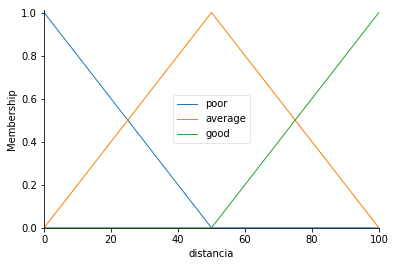

In [605]:
distancia.view()

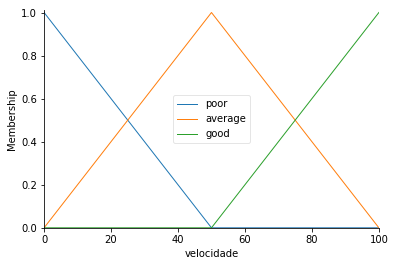

In [606]:
velocidade.view()

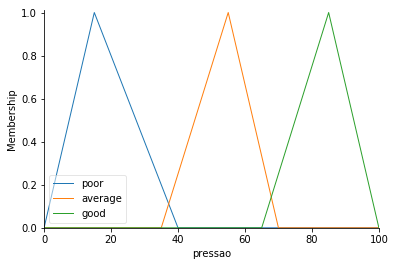

In [607]:
pressao.view()

In [608]:
#DISTANCIA BAIXA E VELOCIDADE MEDIA, PRESSAO MEDIA
rule1 = ctrl.Rule(distancia['poor'] & velocidade['average'], pressao['average'])
#DISTANCIA ALTA E VELOCIDADE BAIXA, PRESSAO BAIXA
rule2 = ctrl.Rule(distancia['good'] & velocidade['poor'], pressao['poor'])
#DISTANCIA ALTA E VELOCIDADE ALTA, PRESSAO MÉDIA
rule3 = ctrl.Rule(distancia['good'] & velocidade['good'], pressao['average'])
#DISTANCIA BAIXA E VELOCIDADE BAIXA, PRESSAO MEDIA
rule4 = ctrl.Rule(distancia['poor'] & velocidade['poor'], pressao['average'])
#DISTANCIA BAIXA E VELOCIDADE ALTA, PRESSAO ALTA
rule5 = ctrl.Rule(distancia['poor'] & velocidade['good'], pressao['good'])
#DISTANCIA MEDIA E VELOCIDADE ALTA, PRESSAO ALTA
rule6 = ctrl.Rule(distancia['average'] & velocidade['good'], pressao['good'])
#DISTANCIA MEDIA E VELOCIDADE BAIXA, PRESSAO MEDIA
rule7 = ctrl.Rule(distancia['average'] & velocidade['poor'], pressao['average'])
#DISTANCIA MEDIA E VELOCIDADE MEDIA, PRESSAO MEDIA
rule8 = ctrl.Rule(distancia['average'] & velocidade['average'], pressao['average'])
#DISTANCIA MEDIA OU VELOCIDADE ALTA, PRESSAO ALTA
rule9 = ctrl.Rule(distancia['average'] | velocidade['good'], pressao['good'])
#DISTANCIA BAIXA OU VELOCIDADE ALTA, PRESSAO ALTA
rule10 = ctrl.Rule(distancia['poor'] | velocidade['good'], pressao['good'])
#DISTANCIA MEDIA OU VELOCIDADE MEDIA, PRESSAO MEDIA
rule11 = ctrl.Rule(distancia['average'] | velocidade['average'], pressao['average'])
#VELOCIDADE ALTA, PRESSAO ALTA
rule12 = ctrl.Rule(velocidade['good'], pressao['good'])
#DISTANCIA BAIXA, PRESSAO ALTA
rule13 = ctrl.Rule(distancia['poor'], pressao['good'])

In [609]:
pressao_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
quantidade_pressao = ctrl.ControlSystemSimulation(pressao_ctrl)

In [610]:
quantidade_pressao.input['distancia'] = 20
quantidade_pressao.input['velocidade'] = 90

quantidade_pressao.compute()

In [611]:
print(quantidade_pressao.output['pressao'])

71.19469559975886


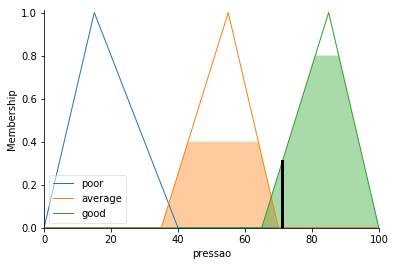

In [612]:
pressao.view(sim=quantidade_pressao)
plt.show()